In [7]:
#!pip install tensorflow  is not working needs administer permission so, go to the preveious Home Jupyter page 
# New -> Terminal -> pip install tensorflow --user
# It worked

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [8]:
tf.__version__

'2.4.1'

In [2]:
(X_train, y_train),(X_test, y_test) = keras.datasets.mnist.load_data()

In [10]:
print(f"X_train {len(X_train)} , X_test {len(X_test)}")

X_train 60000 , X_test 10000


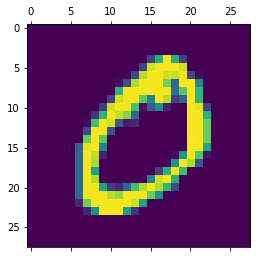

In [11]:
plt.matshow(X_train[1])

### Flattening the images

In [3]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_train_flattened.shape

(60000, 784)

In [5]:
X_test_flattened = X_test.reshape(len(X_test ), 28*28)
X_test_flattened.shape

(10000, 784)

In [6]:
X_train_flattened[0]  # single array

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

### Making Neural Network

In [8]:
model = keras.Sequential([
    keras.layers.Dense(10 , input_shape = (28*28,), activation = 'sigmoid')
])

model.compile(optimizer = 'adam', 
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

model.fit(X_train_flattened , y_train , epochs =5)

Epoch 1/5
1875/1875 [==============================] - 3s 722us/step - loss: 17.4429 - accuracy: 0.7701
Epoch 2/5
1875/1875 [==============================] - 1s 678us/step - loss: 5.8652 - accuracy: 0.8793
Epoch 3/5
1875/1875 [==============================] - 1s 696us/step - loss: 5.4783 - accuracy: 0.8837
Epoch 4/5
1875/1875 [==============================] - 1s 681us/step - loss: 5.1908 - accuracy: 0.8891
Epoch 5/5
1875/1875 [==============================] - 1s 672us/step - loss: 5.4495 - accuracy: 0.8846


#### To further increase the accuracy  - scale the values

In [10]:
X_train_flattened = X_train_flattened / 255
X_test_flattened = X_test_flattened / 255

In [11]:
model = keras.Sequential([
    keras.layers.Dense(10 , input_shape = (28*28,), activation = 'sigmoid')
])

model.compile(optimizer = 'adam', 
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

model.fit(X_train_flattened , y_train , epochs =5)

Epoch 1/5
1875/1875 [==============================] - 2s 717us/step - loss: 0.7334 - accuracy: 0.8070
Epoch 2/5
1875/1875 [==============================] - 1s 692us/step - loss: 0.3058 - accuracy: 0.9159
Epoch 3/5
1875/1875 [==============================] - 1s 686us/step - loss: 0.2827 - accuracy: 0.9206
Epoch 4/5
1875/1875 [==============================] - 1s 699us/step - loss: 0.2787 - accuracy: 0.9217
Epoch 5/5
1875/1875 [==============================] - 1s 740us/step - loss: 0.2694 - accuracy: 0.9255


In [12]:
model.evaluate(X_test_flattened , y_test)

313/313 [==============================] - 0s 603us/step - loss: 0.2673 - accuracy: 0.9251


[0.26726964116096497, 0.9251000285148621]

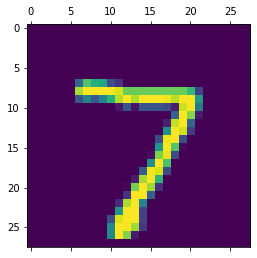

In [13]:
plt.matshow(X_test[0])

In [15]:
y_pred = model.predict(X_test_flattened)
y_pred[0]  

# returning score of each no.


array([1.3664246e-02, 3.1173943e-07, 4.2844385e-02, 9.5533574e-01,
       2.6248395e-03, 6.9231719e-02, 1.2601461e-06, 9.9980009e-01,
       1.0703859e-01, 6.5723878e-01], dtype=float32)

In [17]:
np.argmax(y_pred[0])

7

### confusion matrix

In [23]:
y_pred_labels = [np.argmax(i) for i in y_pred]

cm = tf.math.confusion_matrix( labels = y_test , predictions = y_pred_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 956,    0,    1,    2,    0,    5,   10,    3,    3,    0],
       [   0, 1111,    3,    2,    0,    1,    4,    2,   12,    0],
       [   3,    9,  923,   15,    7,    2,   13,   12,   44,    4],
       [   3,    0,   22,  914,    0,   19,    3,   14,   29,    6],
       [   1,    1,    2,    1,  917,    0,   12,    5,   10,   33],
       [   9,    3,    2,   35,   10,  751,   18,    9,   47,    8],
       [   7,    3,    5,    1,    7,    9,  920,    2,    4,    0],
       [   1,    5,   23,    3,    7,    0,    0,  957,    3,   29],
       [   5,    7,    6,   16,    9,   14,   10,   12,  890,    5],
       [   8,    7,    2,    9,   26,    5,    0,   30,   10,  912]])>

<AxesSubplot:>

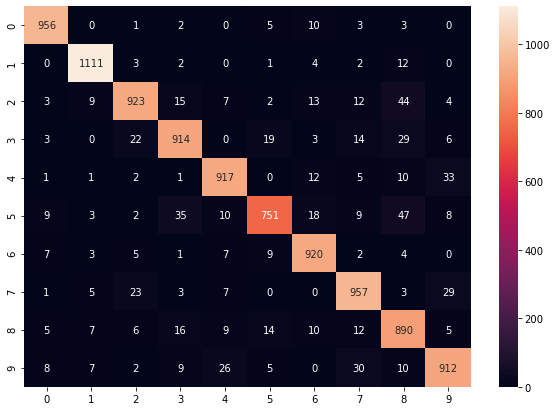

In [27]:
import seaborn as sns
plt.figure(figsize = (10, 7))
sns.heatmap(cm , annot = True, fmt = 'd' )

### Adding more hidden layer

In [28]:
model = keras.Sequential([
    keras.layers.Dense(100 , input_shape = (28*28,), activation = 'relu'),
    keras.layers.Dense(10, activation = 'sigmoid')
])

model.compile(optimizer = 'adam', 
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

model.fit(X_train_flattened , y_train , epochs =5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4417 - accuracy: 0.8739
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1266 - accuracy: 0.9638
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0846 - accuracy: 0.9741
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0646 - accuracy: 0.9806
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0488 - accuracy: 0.9860


### Saving the model

In [50]:
!pip install keras

  Using cached Keras-2.4.3-py2.py3-none-any.whl (36 kB)


In [52]:
# import joblib
  
# # Save the model as a pickle in a file
# joblib.dump(model, 'digit_model.pkl')


# import pickle
# with open('digit_model.pickle','wb') as f:
#     pickle.dump(model,f)


from keras.models import load_model

model.save('digit_model.h5') 

<AxesSubplot:>

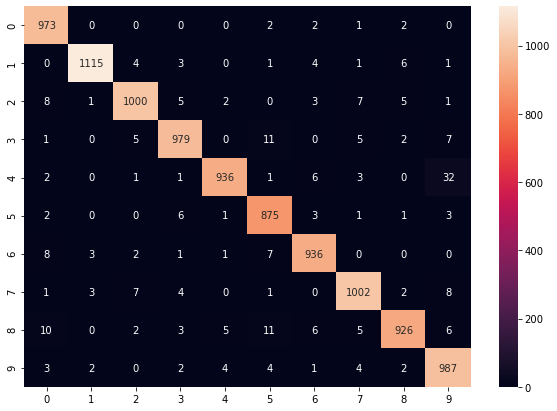

In [31]:
y_pred = model.predict(X_test_flattened)
y_pred_labels = [np.argmax(i) for i in y_pred]

cm = tf.math.confusion_matrix( labels = y_test , predictions = y_pred_labels)
cm
plt.figure(figsize = (10, 7))

sns.heatmap(cm , annot = True, fmt = 'd' )

### Built-in flattening method

In [37]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(100 , activation = 'relu'),
    keras.layers.Dense(10, activation = 'sigmoid')
])

model.compile(optimizer = 'adam', 
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

model.fit(X_train/255 , y_train , epochs =5)

Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4583 - accuracy: 0.8689
Epoch 2/5
1875/1875 [==============================] - 2s 943us/step - loss: 0.1322 - accuracy: 0.9631
Epoch 3/5
1875/1875 [==============================] - 2s 990us/step - loss: 0.0877 - accuracy: 0.9739
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0657 - accuracy: 0.9802
Epoch 5/5
1875/1875 [==============================] - 2s 912us/step - loss: 0.0464 - accuracy: 0.9858
